# Proyecto Número Dos - Ecuación de Onda
El problema que fue escogido para resolver fue el uso de la libreria DifferentialEquations para resolver la ecuación de onda independiente del tiempo en un sistema de coordenadas polares con una simetria rotacional, el cual estará bajo tres ambientes diferentes. Estos ambientes son los siguientes:
+ Onda libre.
+ Onda amortiguada debido a un medio viscoso.
+ Onda amortiguada debido a un medio viscoso y con una pared circular la cual puede amortiguar la onda o aumentar su intensidad.

La ecuación de onda en tres dimensiones es descrita por la siguiene ecuación diferencial parcial:
\begin{equation}
\nabla^2 \psi = \frac{1}{\nu^2} \frac{\partial^2 \psi}{\partial t^2}.
\end{equation}
Si tomamos en cuenta el sistema de coordenadas polares, se tiene que el operador laplaciano esta definido de la siguiente manera:
\begin{equation}
\nabla^2 = \frac{1}{r}\frac{\partial }{\partial r}\left(r\frac{\partial}{\partial r}\right) + \frac{1}{r^2}\frac{\partial^2}{\partial \phi^2}.
\end{equation}
Al suponer que existe una simetria rotacional, la ecuación de onda se transforma en lo siguiente:
\begin{equation}
\frac{1}{r}\frac{\partial}{\partial r}\left(r\frac{\partial \psi}{\partial r}\right)  = \frac{1}{\nu^2} \frac{\partial^2 \psi}{\partial t^2}.
\end{equation}
Realizando una separación de variables, suponiendo que
\begin{equation}
\psi(r,t)= R(r)T(t)
\end{equation}
se obtienen las siguientes dos ecuaciones diferenciales
\begin{equation}
\frac{1}{r}\frac{d}{d r}\left(r\frac{d R}{d r}\right)+k^2R =0 \qquad
\frac{d^2 T}{dt^2}+k^2T=0.
\end{equation}
Para este caso, solo analizaremos la parte espacial, por lo que al realizar esas series de derivadas, la ecuación diferencial para la función radial es la siguiente:
\begin{equation}
\frac{d^2R}{dr^2} + \frac{1}{r}\frac{dR}{dr}+k^2R=0
\end{equation}


El objetivo de este proyecto será obtener la visualización de la función de onda dependiente de r y en un mapa de color. Es por ellos que el esquema de trabajo es el siguiente:
+ Definir parámetros de entrada como las dimensiones del área por analizar, constantes de amortiguación, velocidad de la onda, regiones especiales.
+ Definir la ecuación diferencial para el caso a analizar.
+ Solución de la ecuación diferencial.
+ Creación del mapa de valores.
+ Creación de las gráficas.

In [1]:
using DifferentialEquations
using Plots

## Parte 1 - Modelo determinista
En esta parte del proyecto se tomara la ecuación diferencial para una onda libre
\begin{equation}
\frac{d^2R}{dr^2} + \frac{1}{r}\frac{dR}{dr}+k^2R=0
\end{equation}
Con lo cual los parámetros necesarios serán 
+ Dimensiones del área por analizar
+ Velocidad de la onda

Como se quiere realizar una gráfica de color, se necesitara crear una matriz con los valores de la solución de la ecuación diferencial.
El algoritmo se este proceso se encuentra en la función llamada $\textit{fill_map}$, al existir una simetria rotacional en el sistema, se aprovechara de esto, analizando solo un cuadrante de la región por analizar, y por medio de reflexiones en los ejes se obtendran los valores de los otros cuadrantes. A cada celda se correspondera una posición con respecto al centro, para la asignación del valor de la función de onda se tomara en cuenta la siguiente condición:
\begin{equation}
r_{\text{celda}}-r_{ij} <= 0.001
\end{equation}
por lo que cuando $r_{\text{celda}}>r_{ij}$ entonces la posicion de la matriz ij tendra el valor $R(r_{ij})$

In [2]:
"""
Función principal para la creación del mapa de valores
Parámetros de entrada:
x    -> valores radiales
y    -> valores de R(r), solución de la ED
map  -> matriz inicial con valores en 0
size -> Dimensiones del área por analizar
"""
function fill_map(x,y,map,size)
    # Movimiento en la horizontal de la matriz
    for i in 1:size
        # Valores para aprovechar la simetría en la horizontal
        pos_i=pos_values(i,size)
        # Movimiento en la vertical de la matriz
        for j in 1:size
            # Valores para aprovechar la simetría en la vertical
            pos_j=pos_values(j,size)
            # Asignación de los valores
            fill_pos(pos_i,pos_j,x,y,map,i,j,size)
        end
    end
end

fill_map

In [12]:
"""
Función para la asignación de los valores
Parámetros de entrada:
pos_i -> posiciones de la matriz con simetría horizontal
pos_j -> posiciones de la matriz con simetría vertical
x     -> valores radiales
y     -> valores de R(r), solución de la ED
map   -> matriz inicial con valores en 0
size  -> Dimensiones del área por analizar
i,j   -> posicion radial (x(i)) y soluciones de ED (y(j))
"""
function fill_pos(pos_i,pos_j,x,y,map,i,j,size)
    # Cambios en las posiciones de simetría horizontal
    for ii in pos_i
        # Cambios en las posiciones de simetría vertical
        for jj in pos_j
            # Calculo de la r de la celda por asignar valor de R(r)
            r_ij=(x[i]^2+x[j]^2)^(1/2)
            # Llenado de valores en el mapa
            map[ii,jj]=fill_values(x,y,r_ij,size)
        end 
    end
end

fill_pos

In [4]:
"""
Función para el calculo de las posiciones con simetrias horizontales y verticales
Parámetros de entrada:
pos  -> posicion del cuadrante para las simetrias
size -> Dimensiones del área por analizar
"""
function pos_values(pos,size)
    return [size-pos+1,size+pos]
end 

pos_values

In [5]:
"""
Funcion que realiza la decision de que valor tendra esa celda
Parámetros de entrada:
x    -> valores radiales
y    -> valores de R(r), solución de la ED
r_ij -> posicion radial correspondiente a la celda
size -> Dimensiones del área por analizar
"""
function fill_values(x,y,r_ij,size)
    # Variable boleana que controla el ciclo
    istrue=true
    # Posición de la matriz de la r y R(r)
    n=1
    # Variable que regresara el valor correspondiente a la posicion r_ij
    value=0
    while istrue && n<size-1
        # Condición para la decisión
        if r_ij-x[n]<=0.001
            # Guardado del valor
            value=y[n]
            # Cambio para detener el ciclo
            istrue=false
        else
            # Cambio en la posición de r y R(r)
            n+=1
        end 
    end 
    return value
end 

fill_values

In [6]:
"""
Función que regresa el tamaño de la matriz introducida
Creada ya que las matrices que da la libreria DifferentialEquations 
no tiene definida size()
Parámetros de entrada:
x -> matriz que se calculara su tamaño
"""
function obtain_size(x)
    size=0
    for i in x
        size+=1
    end
    return size
end 

obtain_size

In [7]:
"""
Función de arroja los valores de r,R(r) y el tamaño de estas matrices
Parámetros de entrada:
model -> objeto creado por ODEProblem()
"""
function solve_PDE(model)
    # Solución de la ecuación diferencial
    y = solve(model, Vern9(), abs_tol=1e-16, rel_tol=1e-16)
    # Extracción de los valores de r
    x_sol=convert(Array,y.t)
    # Extracción de los valores de R(r)
    y_sol=convert(Array,y)[1,:]
    # Calculo de la dimension de las matrices r y R(r)
    size=obtain_size(y_sol)
    return x_sol,y_sol,size
end 

solve_PDE

In [8]:
"""
Funcion que realiza las graficas de la función radial y el mapa de colores en uno solo, en
la parte izquiera la función radial y en la parte derecha el mapa de colores
Parámetros de entrada:
x_sol -> valores de r de la solucion de la ED
y_sol -> valores de R(r) de la solucion de la ED
size  -> tamaño de las matrices de r y R(r)
"""
function plot_graphics(x_sol,y_sol,size)
    # Creacion de la matriz para el mapa
    map=zeros(2*size,2*size)
    # Calculo de los valores de r para cada celda
    r=2^(1/2)*x_sol
    # Llenado de los valores de R(r) a cada celda del mapa
    fill_map(r,y_sol,map,size)
    # Creación de la gráfica del mapa de colores
    color_map=heatmap(1:2*size,1:2*size,map,color=cgrad(:inferno))
    # Creación de la gráfica de la función de onda
    radial_function=plot(x_sol,y_sol)
    # Agrupación de las gráfica de la función de onda y el mapa de colores
    plot(radial_function,color_map)
end

plot_graphics

In [9]:
"""
Función que realiza todo el proceso para la obtención de las gráficas 
a partir de los parámetros iniciales
Parámetros de entrada:
df      -> Ecuación diferencial
u0      -> Condiciones iniciales
minimum -> valor inicial del área por analizar
maximum -> valor final del área por analizar
"""
function solving_PDE(df,u0,minimum,maximum)
    # Creación del modelo para la ED
    model = ODEProblem(df,u0,(minimum,maximum))
    # Solucion de la ED
    x_sol,y_sol,size=solve_PDE(model)
    # Gráficas de la ED
    plot_graphics(x_sol,y_sol,size)
end

solving_PDE

In [10]:
"""
Función de la ecuación de onda libre
"""
function df(du,u,p,y)
    # Velocidad de la onda
    k=1
    # Función de la velocidad de la onda
    du[1]=u[2]
    # Ecuación diferencial de la onda libre
    du[2]=-u[2]/y-k^2*u[1]
end

df

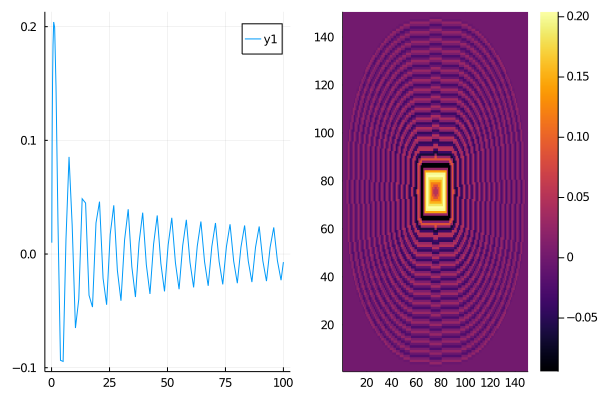

In [13]:
# Posición y velocidad inicial de la onda
u0=[0.01,1]
# Área por analizar
min_value,max_value=0.1,100
# Solución y gráficas 
solving_PDE(df,u0,min_value,max_value)

## Parte 2 - Modelo estocástico 
Para la segunda parte del proyecto se propuso agregar un medio viscoso que afecte a la ecuación diferencial. Una de las maneras en las cuales de modela este tipo de fenomeno es por medio de suponer que este afecta proporcionalemente a la velocidad, por lo tanto la ecuación diferencial obtendra un nuevo parámetro el cual modificara a la ecuación diferencial de la siguiente manera:

\begin{equation}
\frac{d^2R}{dr^2} + \frac{1}{r}\frac{dR}{dr}+k^2R-p\frac{dR}{dt}=0
\end{equation}

Este parámetro sera asignado como una variable aleatoria, la cual obtendra su valor al inicio del calculo.

El esquema quedara invariante, lo que cambiara sera la función $\textit{solving_PDE}$ para que contemple este nuevo parámetro.

In [14]:
"""
Función que realiza todo el proceso para la obtención de las gráficas 
a partir de los parámetros iniciales
Parámetros de entrada:
df      -> Ecuación diferencial
u0      -> Condiciones iniciales
minimum -> valor inicial del área por analizar
maximum -> valor final del área por analizar
p       -> parámetros de la ecuación diferencial
  p[1]  -> velocidad de la onda
  p[2]  -> constante de viscosidad del medio
"""
function solving_PDE(df,u0,minimum,maximum,p)
    # Creación del modelo para la ED
    model = ODEProblem(df,u0,(minimum,maximum),p)
    # Solucion de la ED
    x_sol,y_sol,size=solve_PDE(model)
    # Solución y gráficas 
    plot_graphics(x_sol,y_sol,size)
end

solving_PDE

In [15]:
"""
Función de onda que contempla la viscodidad del medio
"""
function df_stochastic(du,u,p,y)
    du[1]=u[2]
    du[2]=-u[2]/y-p[1]^2*u[1]-p[2]*u[2]
end 

df_stochastic

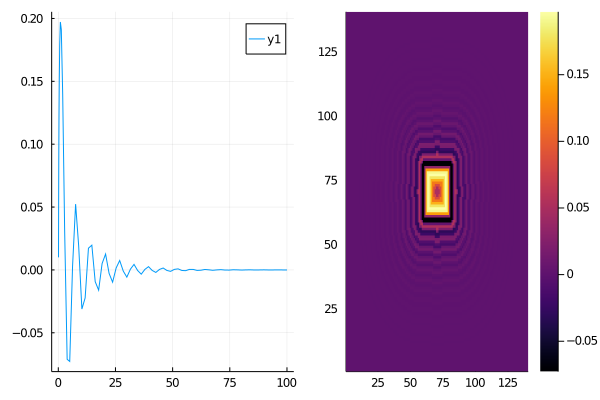

In [16]:
# Condiciones iniciales del sistema (posición y velocidad)
u0=[0.01,1]
# Valores mínimos y máximos del área
min_value,max_value=0.1,100
# Constante k de la onda, Viscosidad del medio como variable aleatoria
p=[1,rand()*rand()]
# Solución y gráficas de la ED
solving_PDE(df_stochastic,u0,min_value,max_value,p)

## Parte 3 - Refinación adicional
Para la tercera parte del proyecto se mantuvo la condición de la viscodad del medio como variable aleatoria y se añadio una condicion en la variable r, en la que se definen zonas en forma de anillo en las cuales la ecuación diferencial tiene tiene un valor constante. Por lo cual, la ecuación diferencial que se modelará sera la siguiente
\begin{equation}
\frac{d^2R}{dr^2}=\left\lbrace \begin{matrix}
-\frac{1}{r}\frac{dR}{dr}-k^2R-p\frac{dR}{dt} & \text{para} & r_1\geq r\geq r_2 \\
c & \text{para} & r_1<r<r_2
\end{matrix}\right.
\end{equation}

Como anteriormente se definio la función $\textit{solving_PDE}$ para que contemple la introducción de parámetros a la ecuación diferencial no es necesario volverla a definir.

In [17]:
"""
Función que realiza todo el proceso para la obtención de las gráficas 
a partir de los parámetros iniciales
Parámetros:
  p[1]  -> velocidad de la onda
  p[2]  -> constante de viscosidad del medio
  p[3]  -> inicio del anillo 
  p[4]  -> fin del anillo
  p[5]  -> valor de la ED dentro del anillo
"""
function df_plus(du,u,p,y)
    du[1]=u[2]
    if p[3]<y<p[4]
        du[2]=p[5]
    else
        du[2]=-u[2]/y-p[1]^2*u[1]-p[2]*u[2]
    end 
end 

df_plus

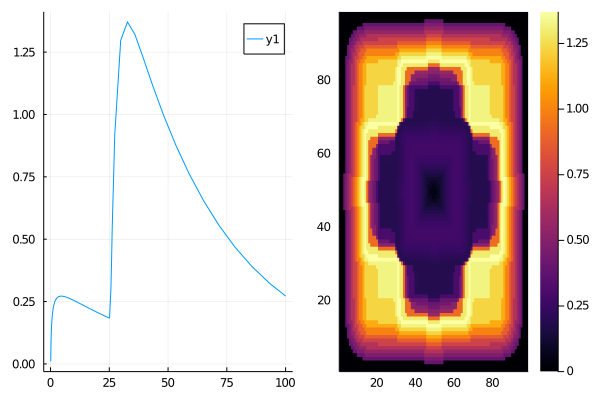

In [18]:
u0=[0.01,1]
min_value,max_value=0.1,100
# Constante K de la onda
p=[0.1,
    # Constante de la viscosidad del medio como variable aleatoria
    rand()*rand(),
    # Inicio del anilo
    25,
    # Fin del anillo
    26,
    # Valor de la ED dentro del anillo
    0.5]
solving_PDE(df_plus,u0,min_value,max_value,p)